<a href="https://colab.research.google.com/github/farzin23i/PyML-SpringSchool2021/blob/main/Workshop1/PMLSC14_2104015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pylab as plt 
import pandas as pd 

# What is image data?

Firstly, let's have a dataset.

In [ ]:
%cd /content/drive/MyDrive/PYMLSpringSchool/pmlsc_WorkShop1/dogs-vs-cats

/content/drive/MyDrive/PYMLSpringSchool/pmlsc_WorkShop1/dogs-vs-cats


In [ ]:
path = '/content/drive/MyDrive/PYMLSpringSchool/pmlsc_WorkShop1/dogs-vs-cats.csv'
df = pd.read_csv (path, index_col='filename')
df.head()

,category
filename,
cat.912.jpg,cat
cat.9089.jpg,cat
cat.9118.jpg,cat
cat.9079.jpg,cat
cat.9098.jpg,cat


In [ ]:
# to read a random image
np.random.seed(52)  # We can make the random process repeatable. Sometimes, in sampling it is needed. 
rnd = np.random.randint (len(df))
img_name = df.iloc[rnd].name
img = plt.imread (f'train/{img_name}')      # img: this is an array containing the loaded image data

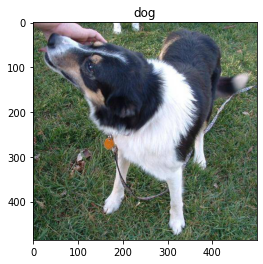

In [ ]:
plt.imshow (img)
plt.title (df.iloc[rnd]['category'])

# plt.xticks([])
# plt.yticks([])
plt.show()

Let's take a look at image data

In [ ]:
type (img)

numpy.ndarray

In [ ]:
# We can find the digital data configuration. Each numpy.ndarray has a shape that can be mined this way:
img.shape 

(486, 500, 3)

here it is, the height, the width and numer of channels of the image. These are all the data stored in pixels. 

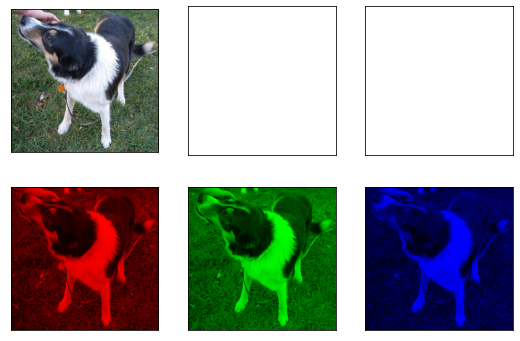

In [ ]:
# Images are nothing but numbers stored in arrays:

fig, ax = plt.subplots (2, 3, figsize=[9,6], sharex=True, sharey=True)
ax= ax.reshape(-1) 

img1 = img.copy()
img1[:,:,1:]=0

img2 = img.copy()
img2[:,:,0], img2[:,:,2] = 0, 0

img3 = img.copy()
img3[:,:,:2]=0

ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].imshow (img)
ax[3].imshow (img1)
ax[4].imshow (img2)
ax[5].imshow (img3)

## make a dummy colored image

In [ ]:
pic = np.random.randint (255, size=[32,32,3])
# pic = np.zeros ([32,32,3])
# pic[:,:,0]= 0
pic[5:20, 5:20, 1] = 255
# pic[:,:,2]= 255


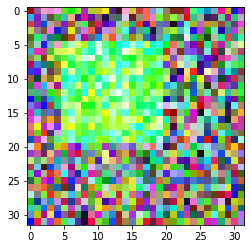

In [ ]:
plt.imshow (pic, cmap='BrBG', vmin=0, vmax=255)

# Load images with tensorflow.keras data generator 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# We need to the loaded images all have same size. We define a size that later the datagenerator will use it. 
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

# The dataGenerator can load images in batches. Later we will discuss the benefits of it. We now seek each time it load 4 images:
batch_size= 4

In [ ]:
# To have a dataFrame the 'filename' be one of columns, not the index of Rows.
df1= df.reset_index ()
df1.head ()

,filename,category
0,cat.912.jpg,cat
1,cat.9089.jpg,cat
2,cat.9118.jpg,cat
3,cat.9079.jpg,cat
4,cat.9098.jpg,cat


In [ ]:
# An intance of ImageDataGenerator, we put some data augmentations on it. Later we will discus more on it. 
# For now we say it will load a modified copy of images with some random modifications in specified range: 
train_datagen = ImageDataGenerator(
    rescale= 1./255,
    
    rotation_range=15,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1, 
    fill_mode="nearest",
)

# And use a method of ImageDataGenerator for loading images. 
# If you are not familiar with object oriented programing, don't worry, 
# it is like a function that uses the dataframe (df1) to load images from given directory ("train"),
# and puts images data into x_col and their labels into y_col.
# It change the size of every image to target_size that we defined it before: IMAGE_SIZE= (128*128)
train_generator = train_datagen.flow_from_dataframe(
    df1, 
    "train", 
    x_col='filename',
    y_col='category',
    target_size= IMAGE_SIZE,
    # shuffle=True,
    class_mode= 'categorical',
    batch_size= batch_size
)

Found 25000 validated image filenames belonging to 2 classes.


Now we have our generator. Let's see how it works. In python, we can flow generators by next() or in for loops.

In [ ]:
len (next(train_generator))

2

It has two outputs, in a tuple. We'll see what is in that:

In [ ]:
type(next(train_generator)[0])

numpy.ndarray

In [ ]:
type(next(train_generator)[1])

numpy.ndarray

and each numpy.ndarray has a shape:

In [ ]:
next(train_generator)[0].shape

(4, 128, 128, 3)

Does these numbers remind you anything? 4 images (batch_size), 128*128 pixels, each has 3 channels

In [ ]:
next(train_generator)[1].shape

(4, 2)

These are supposed to be the labels. But in what way?<br>
Let's take a look at inside:


In [ ]:
next(train_generator)[1]

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

One-hot encoded labels.<br>
Follow this link to read more: [Why One-Hot Encode Data in Machine Learning?](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/)



In [ ]:
images, labels = next(train_generator)

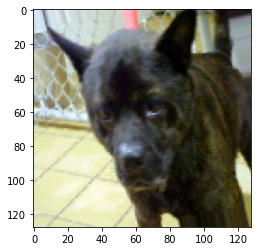

In [ ]:
plt.imshow (images[0])

In [ ]:
labels[0]

array([0., 1.], dtype=float32)

### how to read coded data

#### A fast tuto:

In [ ]:
l= np.arange (10)
np.random.shuffle(l)
l

array([6, 9, 5, 8, 4, 1, 2, 7, 0, 3])

In [ ]:
np.argmax(l)

1

In [ ]:
key = 'a b c d e f g h i j'.split()
key

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

In [ ]:
key[np.argmax(l)]

'b'

### make the key for our dataset

In [ ]:
key_gen = ['cat', 'dog']

In [ ]:
np.argmax(labels, axis=1)

array([1, 0, 1, 1])

In [ ]:
key_gen[np.argmax(labels[0])]

'dog'

In [ ]:
# in another way:
# dic = {'[1. 0.]':'cat', '[0. 1.]':'dog'}

### Test the generator

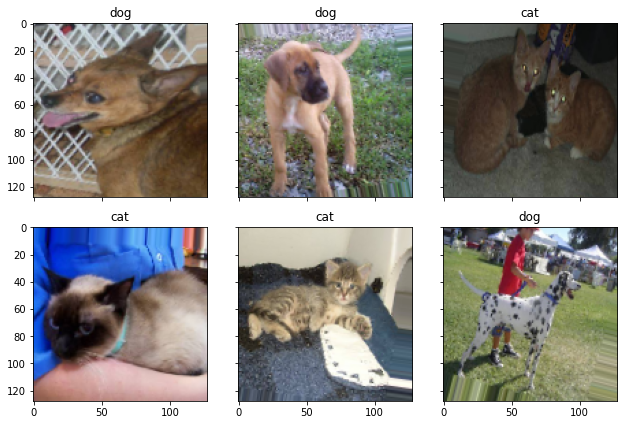

In [ ]:
fig, ax = plt.subplots (2, 3, figsize=[9,6], sharex=True, sharey=True)
ax= ax.reshape(-1)
for i in range (6):
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        ax[i].imshow(image)
        # ax[i].set_title (dic[str(Y_batch[0])])
        # ax[i].set_title (Y_batch[0])
        ax[i].set_title (key_gen[np.argmax(Y_batch[0])])
        break
plt.tight_layout()
plt.show ()

# Matrix Multiplications for the data:


In [ ]:
# images, labels = next(train_generator)
images[0].shape

(128, 128, 3)

In [ ]:
# Now let's take a look at one digital image. The pixels are scaled from (0,255) to range (0,1)
images[0, :5, :2]

array([[[0.83889234, 0.909804  , 0.95750946],
        [0.8353163 , 0.9098261 , 0.96472806]],

       [[0.83270377, 0.90274936, 0.94872284],
        [0.836138  , 0.909804  , 0.9630182 ]],

       [[0.82231164, 0.89149123, 0.93573266],
        [0.83700407, 0.909804  , 0.9612862 ]],

       [[0.8119195 , 0.88023305, 0.9227425 ],
        [0.83787   , 0.909804  , 0.95955414]],

       [[0.8015273 , 0.86897486, 0.90975225],
        [0.83873606, 0.909804  , 0.95782214]]], dtype=float32)

In [ ]:
labels[0]

array([0., 1.], dtype=float32)

in a labeling problem, all is needed is to map image data to the labels. here, to the encoded labels (to a matrix) <br>
so in some way we can imagine the labeling as a simple matrix multiplication, that just is reducing the dimension of data :)

In [ ]:
img_mat = images[0].reshape([1,-1])
img_mat.shape 

(1, 49152)

In [ ]:
labels[0].shape

(2,)

now the question is: what the suitable matrix would be??

In [ ]:
matrix = np.random.random(size=[len(img_mat[0]), 2])
matrix.shape

(49152, 2)

In [ ]:
import tensorflow as tf

In [ ]:
y_pred = tf.matmul(img_mat, matrix)
y_pred

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[8567.955, 8474.459]], dtype=float32)>

In [ ]:
y_pred.numpy()

array([[8567.955, 8474.459]], dtype=float32)

In [ ]:
labels[0] == y_pred.numpy()

array([[False, False]])

so a random matrix can't make it. the question remains: <br>
how to find the best matrix ?